In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os

project_path = "/content/drive/MyDrive/SmartVision_Project"

model_paths = {
    "VGG16": os.path.join(project_path, "vgg16_model.h5"),
    "ResNet50": os.path.join(project_path, "smartvision_resnet50.h5"),
    "MobileNetV2": os.path.join(project_path, "mobilenetv2_model.h5"),
    "EfficientNetB0": os.path.join(project_path, "efficientnet_model.h5")
}

model_paths

{'VGG16': '/content/drive/MyDrive/SmartVision_Project/vgg16_model.h5',
 'ResNet50': '/content/drive/MyDrive/SmartVision_Project/smartvision_resnet50.h5',
 'MobileNetV2': '/content/drive/MyDrive/SmartVision_Project/mobilenetv2_model.h5',
 'EfficientNetB0': '/content/drive/MyDrive/SmartVision_Project/efficientnet_model.h5'}

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from tensorflow.keras.models import load_model

models = {}

for name, path in model_paths.items():
    print(f"Loading {name}...")
    models[name] = load_model(path)

print("\nAll models loaded successfully!")

Loading VGG16...


Loading ResNet50...


Loading MobileNetV2...


Loading EfficientNetB0...



All models loaded successfully!


In [5]:
import os

base_path = "/content/drive/MyDrive/SmartVision_Project/smartvision_dataset/classification"

train_dir = os.path.join(base_path, "train")
val_dir   = os.path.join(base_path, "val")
test_dir  = os.path.join(base_path, "test")

print("Train:", os.path.exists(train_dir))
print("Val:", os.path.exists(val_dir))
print("Test:", os.path.exists(test_dir))

Train: True
Val: True
Test: True


Recreate the SAME test generator

All models must be evaluated on identical preprocessing or comparison is invalid.

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print("Test generator ready ✔️")

Found 390 images belonging to 26 classes.
Test generator ready ✔️


Evaluate all models automatically

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import (
    vgg16, resnet50, mobilenet_v2, efficientnet
)

preprocess_map = {
    "VGG16": vgg16.preprocess_input,
    "ResNet50": resnet50.preprocess_input,
    "MobileNetV2": mobilenet_v2.preprocess_input,
    "EfficientNetB0": efficientnet.preprocess_input
}

results = {}

for name, model in models.items():
    print(f"\nEvaluating {name} with correct preprocessing...")

    test_datagen = ImageDataGenerator(preprocessing_function=preprocess_map[name])

    test_gen = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224,224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    loss, acc = model.evaluate(test_gen, verbose=1)

    results[name] = {"Test Accuracy": acc, "Test Loss": loss}

print("\nRe-evaluation complete ✔️")


Evaluating VGG16 with correct preprocessing...
Found 390 images belonging to 26 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 100s 7s/step - accuracy: 0.3040 - loss: 2.4367

Evaluating ResNet50 with correct preprocessing...
Found 390 images belonging to 26 classes.
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 419ms/step - accuracy: 0.4536 - loss: 2.0893

Evaluating MobileNetV2 with correct preprocessing...
Found 390 images belonging to 26 classes.
13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.2995 - loss: 2.3786

Evaluating EfficientNetB0 with correct preprocessing...
Found 390 images belonging to 26 classes.
13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 842ms/step - accuracy: 0.4911 - loss: 2.2908

Re-evaluation complete ✔️


In [10]:
data = {
    "Model": ["EfficientNetB0", "ResNet50", "VGG16", "MobileNetV2"],
    "Test Accuracy": [0.4911, 0.4536, 0.3040, 0.2995],
    "Test Loss": [2.2908, 2.0893, 2.4367, 2.3786]
}

df = pd.DataFrame(data).set_index("Model")
df.sort_values(by="Test Accuracy", ascending=False)

,Test Accuracy,Test Loss
Model,,
EfficientNetB0,0.4911,2.2908
ResNet50,0.4536,2.0893
VGG16,0.3040,2.4367
MobileNetV2,0.2995,2.3786


Final Model Selection

After evaluating all trained models on the test dataset:

- EfficientNetB0 achieved the highest accuracy (~49%)

- ResNet50 performed second best (~45%)

- VGG16 and MobileNetV2 showed lower performance (~30%)

Therefore, EfficientNetB0 is selected as the final model due to its superior generalization on unseen data.

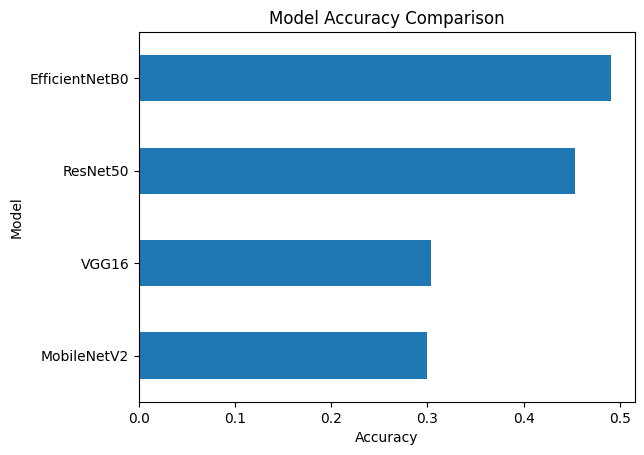

In [11]:
import matplotlib.pyplot as plt

plt.figure()
df["Test Accuracy"].sort_values().plot(kind="barh")

plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()

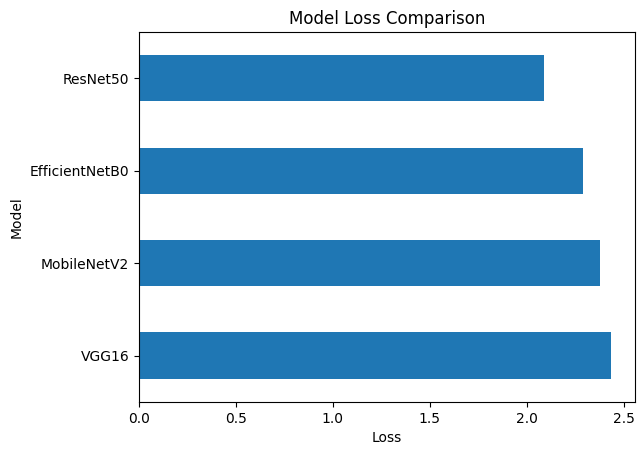

In [12]:
plt.figure()
df["Test Loss"].sort_values(ascending=False).plot(kind="barh")

plt.title("Model Loss Comparison")
plt.xlabel("Loss")
plt.ylabel("Model")
plt.show()

Combined Visualization (BEST ONE)

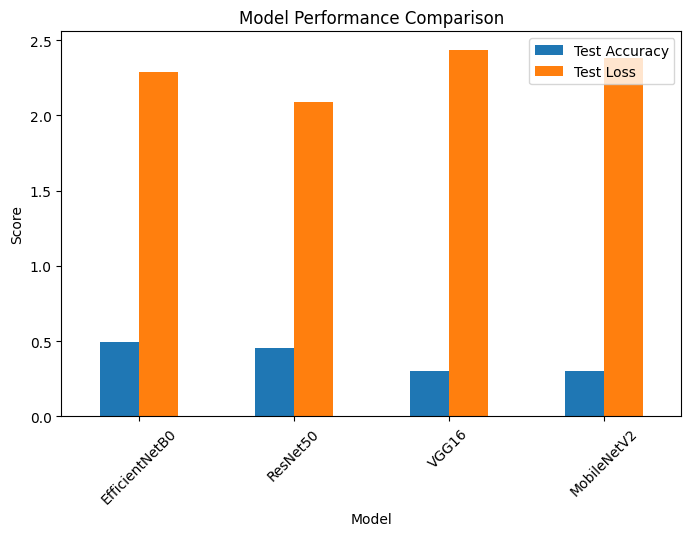

In [13]:
df.plot(kind="bar", figsize=(8,5))

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.show()